In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels
import sklearn
import matplotlib

In [2]:
df = pd.read_csv('MaunaLoa.csv',parse_dates=['Year-Month'],index_col='Year-Month')
df.head()

,CO2 ppm
Year-Month,
1965-01-01,319.32
1965-02-01,320.36
1965-03-01,320.82
1965-04-01,322.06
1965-05-01,322.17


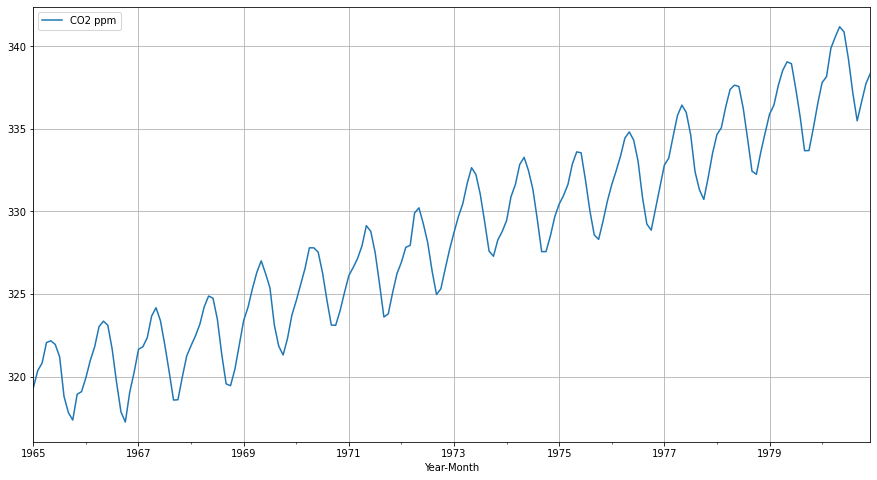

In [3]:
from pylab import rcParams

rcParams['figure.figsize'] = 15,8
df.plot();
plt.grid()

### Plot a boxplot to understand the variation of Carbon Dioxide in parts per million with respect to months across years

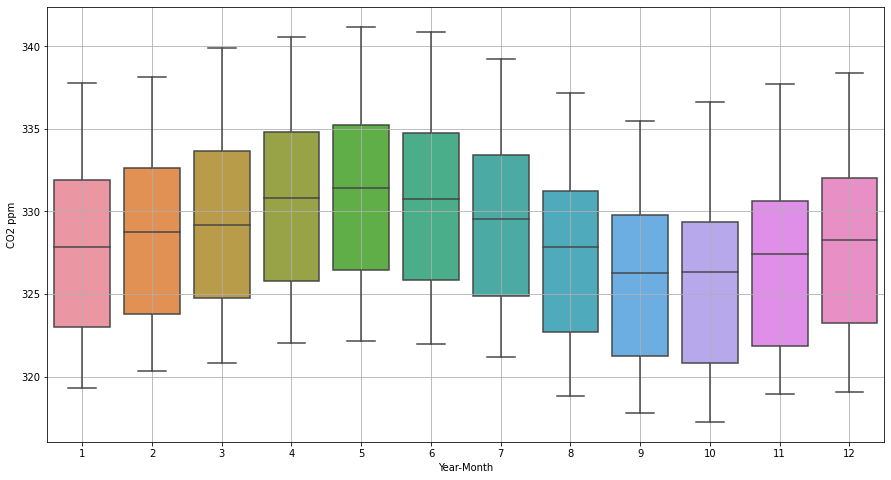

In [4]:
sns.boxplot(x=df.index.month,y=df['CO2 ppm'])
plt.grid();

### Plot a boxplot to understand the variation of Carbon Dioxide in parts per million across years

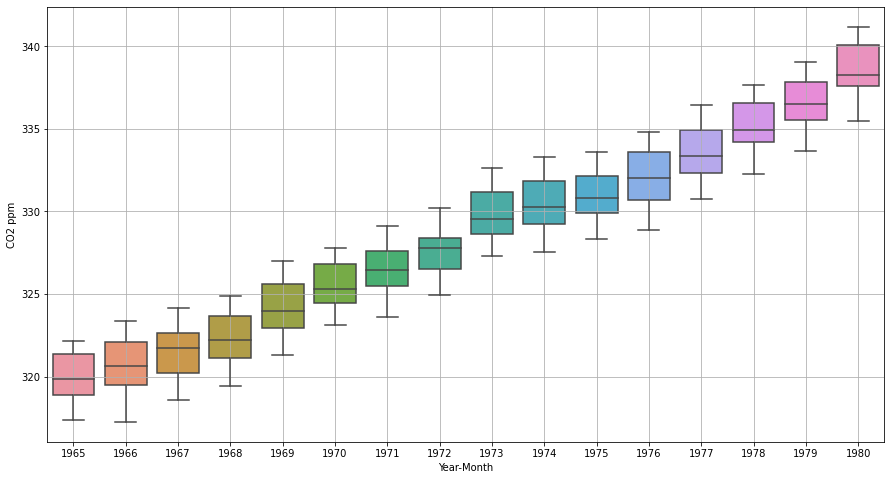

In [5]:
sns.boxplot(x=df.index.year,y=df['CO2 ppm'])
plt.grid();

### Plot a graph of monthly Carbon Dioxide in parts per million across years

In [6]:
monthly_co2ppm_across_years = pd.pivot_table(df, values = 'CO2 ppm', columns = df.index.month_name(), index = df.index.year)
monthly_co2ppm_across_years

Year-Month,April,August,December,February,January,July,June,March,May,November,October,September
Year-Month,,,,,,,,,,,,
1965,322.06,318.81,319.09,320.36,319.32,321.20,321.95,320.82,322.17,318.93,317.37,317.82
1966,323.03,319.64,320.26,320.98,319.94,321.65,323.11,321.81,323.36,319.06,317.25,317.86
1967,323.67,320.29,321.25,321.81,321.65,321.93,323.39,322.36,324.17,319.98,318.60,318.58
1968,324.23,321.34,321.92,322.47,321.88,323.47,324.75,323.17,324.88,320.45,319.45,319.56
1969,326.31,323.12,323.72,324.21,323.40,325.37,326.24,325.33,327.01,322.31,321.31,321.85
1970,327.80,324.63,325.09,325.57,324.60,326.28,327.54,326.55,327.80,323.99,323.11,323.12
1971,327.92,325.62,326.25,326.61,326.12,327.52,328.80,327.16,329.14,325.10,323.80,323.61
1972,329.91,326.39,327.71,327.83,326.93,328.11,329.25,327.95,330.22,326.54,325.32,324.97
1973,331.69,329.36,328.79,329.69,328.73,331.03,332.24,330.47,332.65,328.28,327.29,327.60


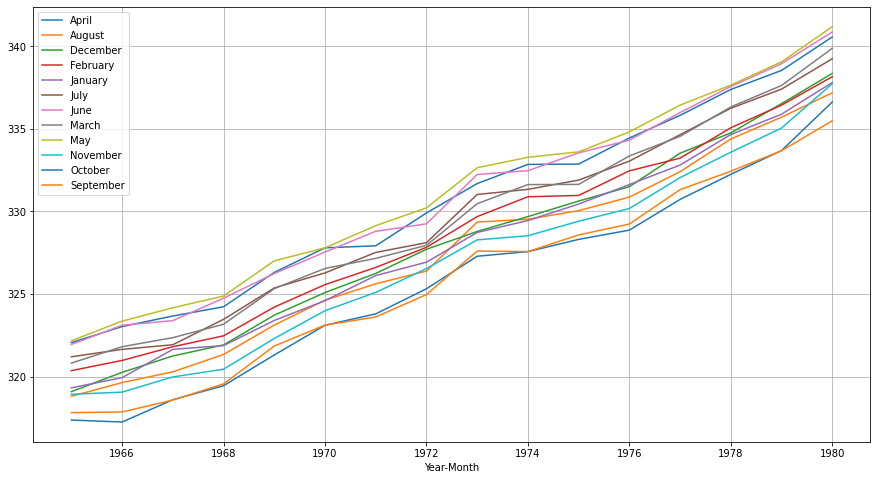

In [7]:
monthly_co2ppm_across_years.plot()
plt.grid()
plt.legend(loc='best');

### Decompose the Time Series to understand the various components

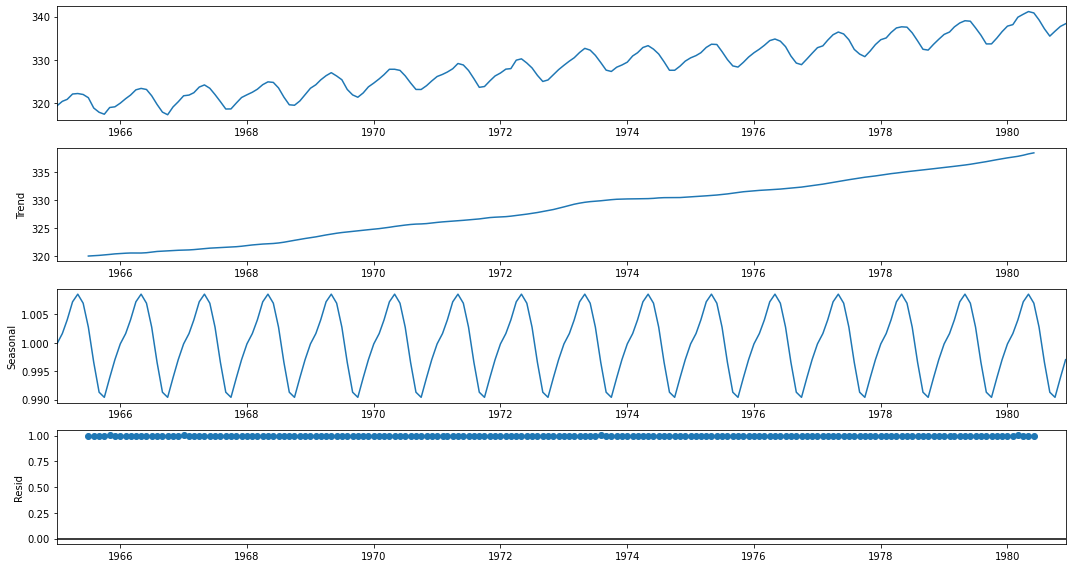

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

### Plot a graph of the average and percentage change of Carbon Dioxide in parts per million across years

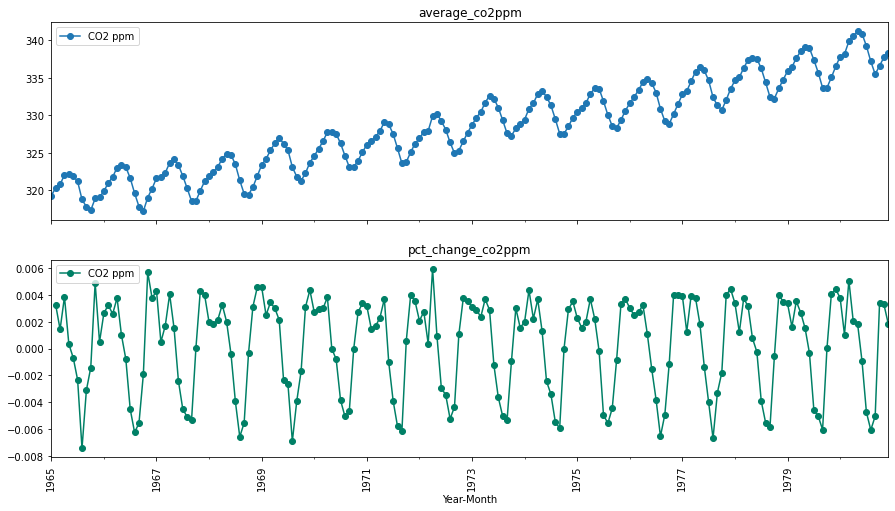

In [9]:
# group by date and get average Customers, and precent change
average_co2ppm    = df.groupby(df.index)["CO2 ppm"].mean()
pct_change_co2ppm = df.groupby(df.index)["CO2 ppm"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average CO2-ppm over time(year-month)
ax1 = average_co2ppm.plot(legend=True,ax=axis1,marker='o',title="average_co2ppm")

ax1.set_xticks(range(len(average_co2ppm)))
ax1.set_xticklabels(average_co2ppm.index.tolist(), rotation=90)

# plot precent change for CO2-ppm over time(year-month)
ax2 = pct_change_co2ppm.plot(legend=True,ax=axis2,marker='o',rot=90,colormap="summer",title="pct_change_co2ppm")

### Split the data into train and test. The first 75% of the data should be in training and last 25% of the data should be in test

In [10]:
train    =   df[0:int(len(df)*0.75)] 
test     =   df[int(len(df)*0.75):]

print(train.head(),'\n')
print(train.tail(),'\n\n')
print(test.head(),'\n')
print(test.tail(),'\n')

            CO2 ppm
Year-Month         
1965-01-01   319.32
1965-02-01   320.36
1965-03-01   320.82
1965-04-01   322.06
1965-05-01   322.17 

            CO2 ppm
Year-Month         
1976-08-01   330.87
1976-09-01   329.24
1976-10-01   328.87
1976-11-01   330.18
1976-12-01   331.50 


            CO2 ppm
Year-Month         
1977-01-01   332.81
1977-02-01   333.23
1977-03-01   334.55
1977-04-01   335.82
1977-05-01   336.44 

            CO2 ppm
Year-Month         
1980-08-01   337.19
1980-09-01   335.49
1980-10-01   336.63
1980-11-01   337.74
1980-12-01   338.36 



### Test the training data for stationarity using the Augmented Dickey-Fuller (ADF) test at  α  = 0.05. If the data is non-stationary, use appropriate measures to stationarize the data and then check for stationarity using the Augmented Dickey-Fuller (ADF) Test at  α  = 0.05

In [11]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

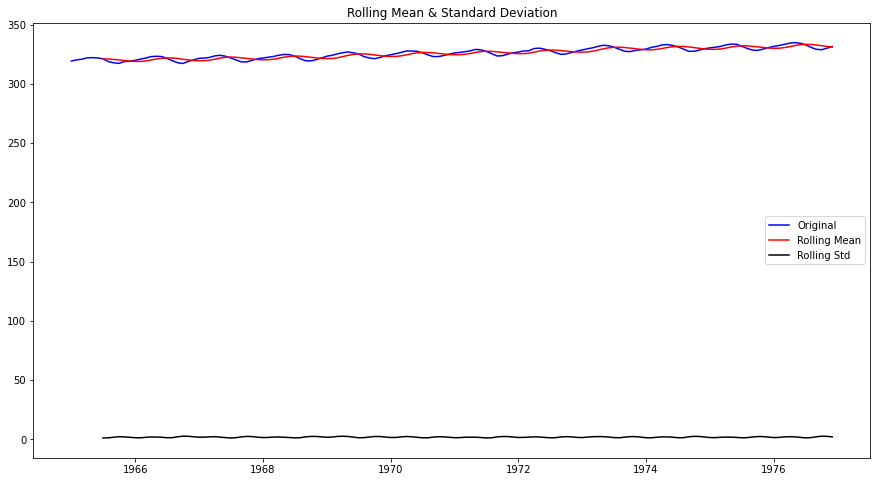

Results of Dickey-Fuller Test:
Test Statistic                  -0.257683
p-value                          0.931288
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64 



In [12]:
test_stationarity(train['CO2 ppm'])

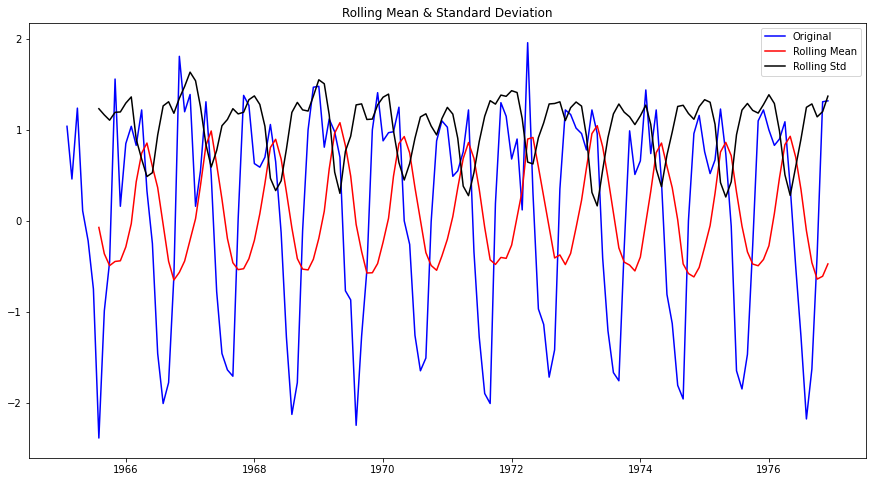

Results of Dickey-Fuller Test:
Test Statistic                  -3.386995
p-value                          0.011410
#Lags Used                      12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64 



In [13]:
test_stationarity(train.diff().dropna())

### Check the ACF and PACF of the training data

In [14]:
train_diff = train.diff(periods=1).dropna()
train_diff

,CO2 ppm
Year-Month,
1965-02-01,1.04
1965-03-01,0.46
1965-04-01,1.24
1965-05-01,0.11
1965-06-01,-0.22
...,...
1976-08-01,-2.18
1976-09-01,-1.63
1976-10-01,-0.37


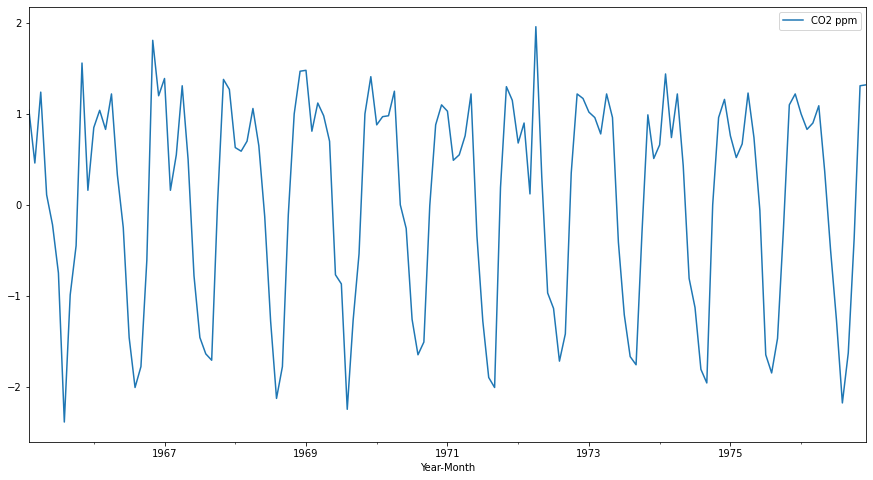

In [15]:
train_diff.plot();

C:\Users\azhag\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


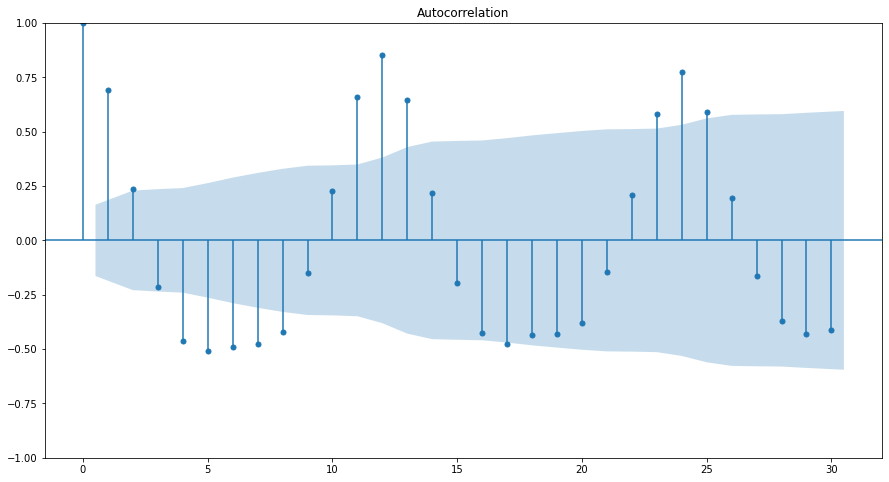

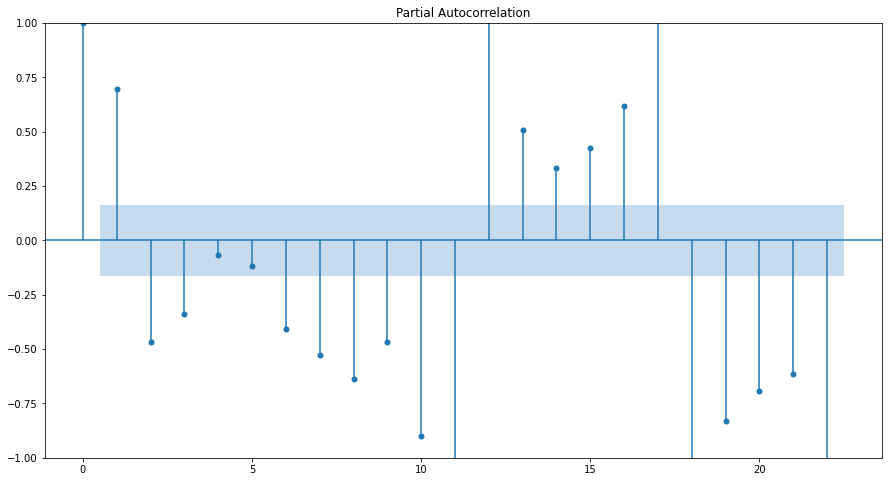

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(train_diff,lags=30)
plot_pacf(train_diff);

### Build an Automated version of an ARIMA model on the training data for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC)

In [17]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [18]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [20]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['CO2 ppm'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:444.71223526814674


C:\Users\azhag\AppData\Local\Temp\ipykernel_10276\2389136381.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\azhag\AppData\Local\Temp\ipykernel_10276\2389136381.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\azhag\AppData\Local\Temp\ipykernel_10276\2389136381.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\azhag\AppData\Local\Temp\ipykernel_10276\2389136381.py:6: FutureWarning: The frame.append method is deprecated and wil

ARIMA(0, 1, 1) - AIC:363.923396127008
ARIMA(0, 1, 2) - AIC:333.3929524232337
ARIMA(1, 1, 0) - AIC:352.7724961777297
ARIMA(1, 1, 1) - AIC:338.10742392866405
ARIMA(1, 1, 2) - AIC:327.25243019806675
ARIMA(2, 1, 0) - AIC:320.9728196750183
ARIMA(2, 1, 1) - AIC:285.00082931037537
ARIMA(2, 1, 2) - AIC:286.52001300823116


C:\Users\azhag\AppData\Local\Temp\ipykernel_10276\2389136381.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\azhag\AppData\Local\Temp\ipykernel_10276\2389136381.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


In [21]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
7,"(2, 1, 1)",285.000829
8,"(2, 1, 2)",286.520013
6,"(2, 1, 0)",320.97282
5,"(1, 1, 2)",327.25243
2,"(0, 1, 2)",333.392952
4,"(1, 1, 1)",338.107424
3,"(1, 1, 0)",352.772496
1,"(0, 1, 1)",363.923396
0,"(0, 1, 0)",444.712235


In [22]:
mod = ARIMA(train['CO2 ppm'], order=(2,1,1))

results_Arima = mod.fit()

print(results_Arima.summary())

                               SARIMAX Results                                
Dep. Variable:                CO2 ppm   No. Observations:                  144
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -138.500
Date:                Mon, 19 Jun 2023   AIC                            285.001
Time:                        23:39:33   BIC                            296.852
Sample:                    01-01-1965   HQIC                           289.817
                         - 12-01-1976                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5291      0.054     28.213      0.000       1.423       1.635
ar.L2         -0.8274      0.054    -15.320      0.000      -0.933      -0.722
ma.L1         -0.8291      0.066    -12.484      0.0

C:\Users\azhag\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\azhag\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\azhag\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


### Predict on the Test Set using this model and evaluate the model on the test set using RMSE and MAPE

In [23]:
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [24]:
from sklearn.metrics import mean_squared_error 
predicted_autoARIMA = results_Arima.forecast(steps=len(test))
predicted_autoARIMA

1977-01-01    332.717760
1977-02-01    333.487603
1977-03-01    333.657145
1977-04-01    333.279400
1977-05-01    332.561515
1977-06-01    331.776372
1977-07-01    331.169826
1977-08-01    330.892019
1977-09-01    330.969104
1977-10-01    331.316837
1977-11-01    331.784765
1977-12-01    332.212538
1978-01-01    332.479459
1978-02-01    332.533652
1978-03-01    332.395658
1978-04-01    332.139816
1978-05-01    331.862793
1978-06-01    331.650895
1978-07-01    331.556103
1978-08-01    331.586489
1978-09-01    331.711384
1978-10-01    331.877217
1978-11-01    332.027446
1978-12-01    332.119942
1979-01-01    332.137073
1979-02-01    332.086734
1979-03-01    331.995587
1979-04-01    331.897868
1979-05-01    331.823866
1979-06-01    331.791566
1979-07-01    331.803409
1979-08-01    331.848244
1979-09-01    331.906999
1979-10-01    331.959744
1979-11-01    331.991779
1979-12-01    331.997120
1980-01-01    331.978781
1980-02-01    331.946319
1980-03-01    331.911857
1980-04-01    331.886022


In [25]:
results_Arima.predict(start=pd.to_datetime('1977-01-01'),end=pd.to_datetime('1980-12-01 '),typ = 'level',dynamic=True,full_results=True)

1977-01-01    332.717760
1977-02-01    333.487603
1977-03-01    333.657145
1977-04-01    333.279400
1977-05-01    332.561515
1977-06-01    331.776372
1977-07-01    331.169826
1977-08-01    330.892019
1977-09-01    330.969104
1977-10-01    331.316837
1977-11-01    331.784765
1977-12-01    332.212538
1978-01-01    332.479459
1978-02-01    332.533652
1978-03-01    332.395658
1978-04-01    332.139816
1978-05-01    331.862793
1978-06-01    331.650895
1978-07-01    331.556103
1978-08-01    331.586489
1978-09-01    331.711384
1978-10-01    331.877217
1978-11-01    332.027446
1978-12-01    332.119942
1979-01-01    332.137073
1979-02-01    332.086734
1979-03-01    331.995587
1979-04-01    331.897868
1979-05-01    331.823866
1979-06-01    331.791566
1979-07-01    331.803409
1979-08-01    331.848244
1979-09-01    331.906999
1979-10-01    331.959744
1979-11-01    331.991779
1979-12-01    331.997120
1980-01-01    331.978781
1980-02-01    331.946319
1980-03-01    331.911857
1980-04-01    331.886022


In [26]:
RMSE_autoARIMA = mean_squared_error(test['CO2 ppm'],predicted_autoARIMA,squared=False)
MAPE_autoARIMA = MAPE(test['CO2 ppm'],predicted_autoARIMA)

print('RMSE for the autofit ARIMA model:',RMSE_autoARIMA,'\nMAPE for the autofit ARIMA model:',MAPE_autoARIMA)

RMSE for the autofit ARIMA model: 4.753883519462695 
MAPE for the autofit ARIMA model: 1.2


In [27]:
resultsDf = pd.DataFrame({'RMSE': [RMSE_autoARIMA],'MAPE':[MAPE_autoARIMA]}
                           ,index=['ARIMA(2,1,1)'])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,1)",4.753884,1.2


### Check for stationarity on the whole data and stationarize the data if needed. Build a model on the whole data using the parameters got from best fit (with respect to the lowest AIC value) ARIMA model.

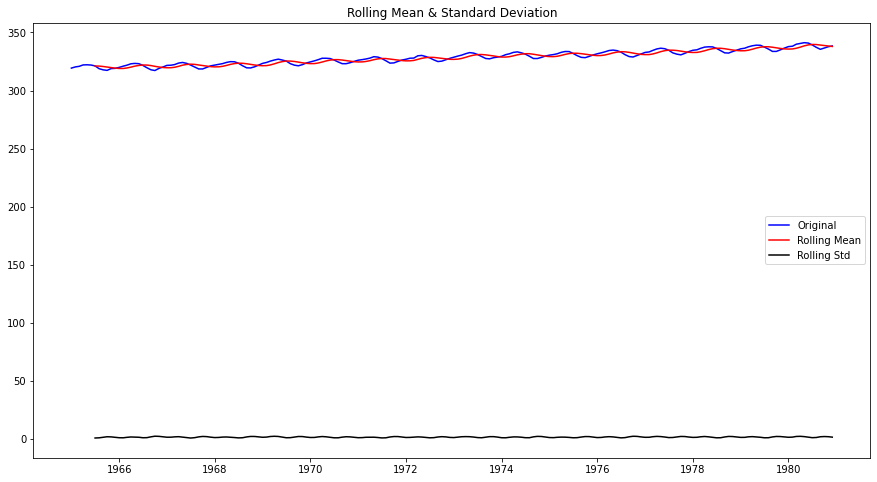

Results of Dickey-Fuller Test:
Test Statistic                   1.269677
p-value                          0.996434
#Lags Used                      12.000000
Number of Observations Used    179.000000
Critical Value (1%)             -3.467420
Critical Value (5%)             -2.877826
Critical Value (10%)            -2.575452
dtype: float64 



In [28]:
test_stationarity(df['CO2 ppm'])

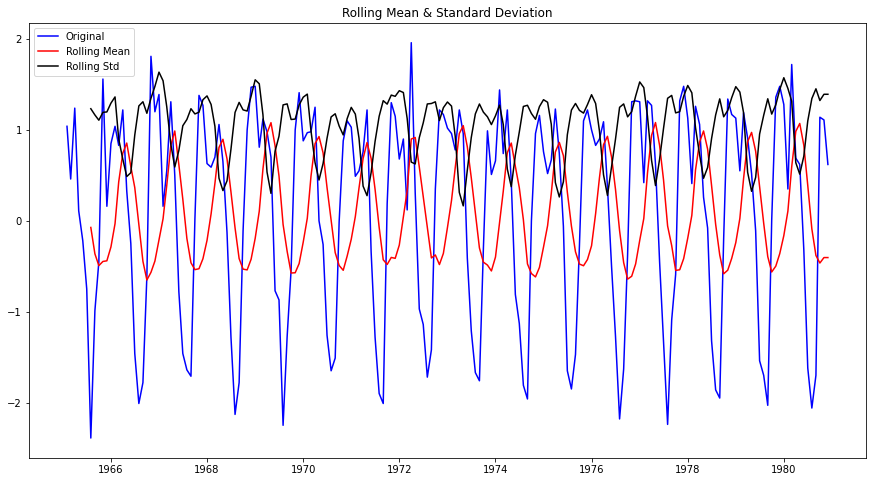

Results of Dickey-Fuller Test:
Test Statistic                  -4.750107
p-value                          0.000068
#Lags Used                      11.000000
Number of Observations Used    179.000000
Critical Value (1%)             -3.467420
Critical Value (5%)             -2.877826
Critical Value (10%)            -2.575452
dtype: float64 



In [29]:
test_stationarity(df['CO2 ppm'].diff().dropna())

In [30]:
#Building the model
full_model_autoARIMA = ARIMA(df['CO2 ppm'], order=(2,1,1))

results_Arima_full_model = full_model_autoARIMA.fit()

print(results_Arima_full_model.summary())

                               SARIMAX Results                                
Dep. Variable:                CO2 ppm   No. Observations:                  192
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -190.652
Date:                Mon, 19 Jun 2023   AIC                            389.305
Time:                        23:42:43   BIC                            402.314
Sample:                    01-01-1965   HQIC                           394.574
                         - 12-01-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5236      0.047     32.128      0.000       1.431       1.617
ar.L2         -0.8195      0.051    -16.209      0.000      -0.919      -0.720
ma.L1         -0.8203      0.061    -13.461      0.0

C:\Users\azhag\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\azhag\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\azhag\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
